In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GRIP/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


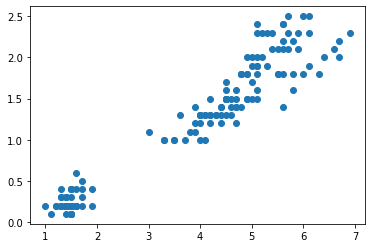

In [ ]:
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'])
plt.show()

**Scaling the graph to get right result**

In [ ]:
scaler = MinMaxScaler()

scaler.fit(data[['PetalLengthCm']])
data['PetalLengthCm'] = scaler.transform(data[['PetalLengthCm']])

scalar.fit(data[['PetalWidthCm']])
data['PetalWidthCm'] =  scaler.transform(data[['PetalWidthCm']])

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,0.067797,-0.135593,Iris-setosa
1,2,4.9,3.0,0.067797,-0.135593,Iris-setosa
2,3,4.7,3.2,0.050847,-0.135593,Iris-setosa
3,4,4.6,3.1,0.084746,-0.135593,Iris-setosa
4,5,5.0,3.6,0.067797,-0.135593,Iris-setosa


**Elbow Point**

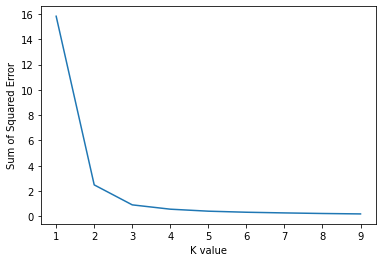

In [ ]:
sse = []
k_range = range(1,10)
for k in k_range:
    model = KMeans(n_clusters=k)
    petal_model = model.fit(data[['PetalLengthCm','PetalWidthCm']])
    sse.append(petal_model.inertia_)

#plot the graph
plt.xlabel('K value')
plt.ylabel('Sum of Squared Error')
plt.plot(k_range,sse)

**Taking K=2 as the appropiate number of cluster**

In [ ]:
model = KMeans(n_clusters=2)
petal_model = model.fit(data[['PetalLengthCm','PetalWidthCm']])
petal_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
petal_predicted = model.fit_predict(data[['PetalLengthCm','PetalWidthCm']])
petal_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
model.cluster_centers_

array([[ 0.66529704,  0.1155624 ],
       [ 0.08374875, -0.12529079]])

In [ ]:
data['cluster'] = petal_predicted
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,0.067797,-0.135593,Iris-setosa,1
1,2,4.9,3.0,0.067797,-0.135593,Iris-setosa,1
2,3,4.7,3.2,0.050847,-0.135593,Iris-setosa,1
3,4,4.6,3.1,0.084746,-0.135593,Iris-setosa,1
4,5,5.0,3.6,0.067797,-0.135593,Iris-setosa,1


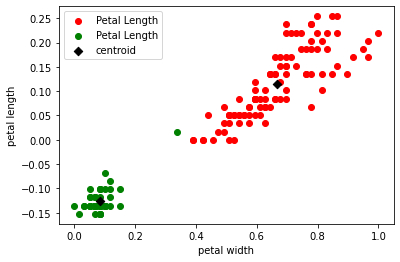

In [ ]:
df1 = data[data.cluster == 0]
df2 = data[data.cluster == 1]

plt.scatter(df1.PetalLengthCm, df1.PetalWidthCm, color='red',label='Petal Length')
plt.scatter(df2.PetalLengthCm, df2.PetalWidthCm, color = 'green', label='Petal Length')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],marker='D', color='black',label='centroid')
plt.xlabel("petal width")
plt.ylabel("petal length")
plt.legend()